In [1]:
import os
import numpy as np
import pickle
import random
import collections
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
import datetime  
from datetime import date 
import calendar 
  
def findDay(date): 
    year, month, day = (int(i) for i in date.split('-'))     
    born = datetime.date(year, month, day)
    return born.strftime("%A") 
  
# Driver program 
date = '2019-03-02'
print(findDay(date)) 

Saturday


In [6]:
df = pd.read_csv('train.csv')

In [7]:
dfv = pd.read_csv('dev.csv')

In [8]:
df.iloc[0]['date']

'2014-12-08'

In [9]:
def date1(x):
    return findDay(x['date'])

In [10]:
date1(df.iloc[0])

'Monday'

In [11]:
def read_data(file):
    '''
    Read each file into a list of strings.
    Example:
    ["it's", 'a', 'curious', 'thing', "i've", 'found', 'that', 'when', 'willis', 'is', 'not', 'called', 'on',
    ...'to', 'carry', 'the', 'whole', 'movie', "he's", 'much', 'better', 'and', 'so', 'is', 'the', 'movie']
    '''
    f = open(file)
    lines = f.read().split(' ')
    symbols = '${}()[].,:;+-*/&|<>=~" '
    words = map(lambda Element: Element.translate(str.maketrans("", "", symbols)).strip(), lines)
    words = filter(None, words)
    return list(words)

In [12]:
class reviewInstance:

    def __init__(self,review):
 
        self.review=review['review']
        self.wordic=[]
        self.weekday=findDay(review['date'])
        self.count=0
        self.label=review['label']
        self.rate=review['rating']
        self.exid=review['ex_id']
        self.userid=review['user_id']
        self.prodid=review['prod_id']
        
        lines = self.review.split(' ')
        symbols = '${}()[].,:;+-*/&|<>=~" '
        words = map(lambda Element: Element.translate(str.maketrans("", "", symbols)).strip(), lines)
        words = filter(None, words)
        self.rlist=list(words)
        self.count=len(self.rlist)

        
    def construct_word_dict(self, stop_word=None, count_words=None):
        """
        Description
        ===========
        Count words in word_list to transform to a dict {word: word_count}
        
        Input
        =====
        stop_word: list
        Words you hope to filter, not included in dict, default set to None
        
        count_words: list
        Words you hope to keep in the count_dict, if set to None, will keep all the words
        """
        wordlist=self.rlist
       
        r = collections.Counter()
        if count_words == None:
            if stop_word:
                for word in wordlist:
                    if word not in stop_word:

                        r[word] += 1
            else: 
                for word in wordlist:
                    r[word] += 1
                    
        else:
            if stop_word:
                for word in wordlist:
                    if word not in stop_word:

                        r[word] += 1
            else: 

                for word in wordlist:
                    if (word not in stop_word) and (word in count_words):

                        r[word] += 1
        self.wordic=r
    
        
        

            

In [13]:
x=reviewInstance(df.iloc[2])

In [14]:
df

,ex_id,user_id,prod_id,rating,label,date,review
0,0,923,0,3.0,1,2014-12-08,The food at snack is a selection of popular Gr...
1,1,924,0,3.0,1,2013-05-16,This little place in Soho is wonderful. I had ...
2,2,925,0,4.0,1,2013-07-01,ordered lunch for 15 from Snack last Friday. ...
3,3,926,0,4.0,1,2011-07-28,This is a beautiful quaint little restaurant o...
4,4,927,0,4.0,1,2010-11-01,Snack is great place for a casual sit down lu...
...,...,...,...,...,...,...,...
250869,358950,14671,349,5.0,0,2014-02-08,Made a reservation for an early dinner Saturda...
250870,358951,3356,349,5.0,0,2014-02-07,"Emily is like Franny's Marco, but with warmth ..."
250871,358953,116424,349,5.0,0,2014-01-31,Can't say enough good things about this place....
250872,358954,161147,349,5.0,0,2014-01-30,"Had a great dinner here- fantastic pizza, the ..."


In [15]:
n=len(df)

In [16]:
n

250874

In [17]:
X=[]
for i in range(n):
    x=reviewInstance(df.iloc[i])
    x.construct_word_dict()
    X.append(x)


In [18]:
n2=len(dfv)

In [19]:

X2=[]
for i in range(n2):
    x=reviewInstance(dfv.iloc[i])
    x.construct_word_dict()
    X2.append(x)




In [85]:
with open('review_train.pkl', 'wb') as f:
        pickle.dump(X, f)

In [20]:
with open('review_train.pkl', "rb") as f:
    review_t=pickle.load(f)

In [48]:
review_t[9].label

1

In [24]:
with open('review_val.pkl', 'wb') as f:
        pickle.dump(X2, f)

In [25]:
with open('review_val.pkl', "rb") as f:
    review_v=pickle.load(f)

In [26]:
n=len(review_t)

In [27]:
n

250874

In [ ]:
weekday1=0
weekend1=0
weekday0=0
weekend0=0
for i in range(n):
    if review_t[i].label==1:
        if review_t[i].weekday == 'Sunday' or review_t[i].weekday == 'Saturday' :
            
            weekend1=weekend1+1
        else:
            weekday1=weekday1+1
    else:
        if review_t[i].weekday == 'Sunday' or review_t[i].weekday == 'Saturday':
            weekend0=weekend0+1
        else:
            weekday0=weekday0+1
        
        
    

In [ ]:
weekend1/(weekday1+weekend1)

In [30]:
weekend0/(weekend0+weekday0)

0.29582990824465133

In [31]:
2/7

0.2857142857142857

Looks like fake reviews are more likely to be sent during weekday 3% higher than real reviews

In [121]:
from sklearn.metrics import roc_auc_score, average_precision_score
def evaluate_model(review_list, weight, evaluation_metric):
    
    x = review_list
    
    y_true_pre = []
    for review in x:
        y_true_pre.append(review.label)

    y_scores_pre = [] #the model predictions
    for i in range(len(x)):
        if dotProduct(weight,x[i].wordic) < 0:
            y_scores_pre.append(0)
        else:
            y_scores_pre.append(1)
    
    y_true = np.array(y_true_pre)
    y_scores = np.array(y_scores_pre)
        
    if evaluation_metric == 'auROC':
        metric = roc_auc_score(y_true, y_scores)
    elif evaluation_metric == 'AP':
        metric = average_precision_score(y_true, y_scores)
    return metric


In [122]:
evaluate_model(review_v, w2, 'auROC')

0.5347439912144787

In [32]:
def dotProduct(d1, d2):
    """
    @param dict d1: a feature vector represented by a mapping from a feature (string) to a weight (float).
    @param dict d2: same as d1
    @return float: the dot product between d1 and d2
    """
    if len(d1) < len(d2):
        return dotProduct(d2, d1)
    else:
        return sum(d1.get(f, 0) * v for f, v in d2.items())

def increment(d1, scale, d2):
    """
    Implements d1 += scale * d2 for sparse vectors.
    @param dict d1: the feature vector which is mutated.
    @param float scale
    @param dict d2: a feature vector.

    NOTE: This function does not return anything, but rather
    increments d1 in place. We do this because it is much faster to
    change elements of d1 in place than to build a new dictionary and
    return it.
    """
    for f, v in d2.items():
        d1[f] = d1.get(f, 0) + v * scale

In [132]:
def fastpegasos(review, max_epoch, lam, watch_list=None, grad_checking=False):
    """
    Description
    ==========
    Implementat
    ion of Pegasos Algorithm 

    Input
    =====
    review_list: list of reviewInstance's
    list of objects with labels and encoded input from reviews

    max_epoch: int 
    stopping condition

    lam: float 
    regularization parameter

    watch_list: list or reviewInstance's
    passed to accuracy_percent or magnitude_compare; default None

    grad_checking: bool 
    numerical test of gradient of svm objective

    Output
    ======
    weights
    """
    
    #Initialization
    s=1
    w = collections.Counter()
    epoch = 0
    t = 1
    n = len(review)
    
    

    #Loop
    # Use the util.increment and util.dotProduct functions in update
    while epoch < max_epoch:
        #print("epoch=", epoch)
        for i in range(n):
            y = review[i].label*2-1
            
         

                
            t = t+1
            ita = 1/(t*lam)
            s=(1-ita*lam)*s
            
            
            
            
            if y*dotProduct(w, review[i].wordic) < 1:
                
                
                
                #Implements d1 += scale * d2 for sparse vectors.
                
                increment(w, ita*y/s,review[i].wordic)
            
        
        epoch=epoch+1
    increment(w,s-1,w)
    
        
    return w

In [135]:
review_t[10].label

1

In [136]:
w=fastpegasos(review_t, 5 , 0.1, watch_list=None, grad_checking=False)

In [137]:
def rate(w,review):

    n=len(review)
    cor=0
    wro=0
    for i in range(n):
        if (review[i].label*2-1)*np.sign(dotProduct(w,review[i].wordic)) > 0:
            cor = cor + 1
        else:
            wro = wro + 1
    return wro/(cor+wro)

In [138]:
rate(w,review_v)

0.11645971379252743

In [139]:
evaluate_model(review_v, w, 'auROC')

0.5188665213059764

## Oversampling

Gather all fake reviews, which is minority.

In [140]:
review_f=[]
n=len(review_t)
for i in range(n):
    if review_t[i].label==1:
        review_f.append(review_t[i])

### The first method is randomly oversampling

In [159]:
def random_over_sample(review_f,review_t,K):
    """
    Description
    =========
    review_f: class of Minority
    review_t: all classes(trainning set)
    K: number of additional oversampling we want to add to training.
    """
    n=len(review_f)
    review=[]
    
    for i in range(K):
        j=random.randint(0,n-1)
        review.append(review_f[j])
    review=review+review_t
    random.shuffle(review)
    return review
        
        
    
    

In [160]:
f=len(review_f)

In [161]:
f

25819

In [162]:
review_t2=random_over_sample(review_f,review_t,f*5)

In [165]:
w2=fastpegasos(review_t2,5, 0.1, watch_list=None, grad_checking=False)

In [166]:
rate(w2,review_v)

0.18277743749651984

In [167]:
evaluate_model(review_v, w2, 'auROC')

0.5623150541755692

Now let's try various numbers of oversampling:

In [168]:
W=[]
for i in [1,2,3,4,5,6,7,8,9]:
    review_t2=random_over_sample(review_f,review_t,f*i)
    wt = fastpegasos(review_t2,5, 0.1, watch_list=None, grad_checking=False)
    W.append(wt)

    
    

In [176]:
Y=[]
for i in range(9):
    Y.append(evaluate_model(review_v, W[i], 'auROC'))

Text(0, 0.5, 'score')

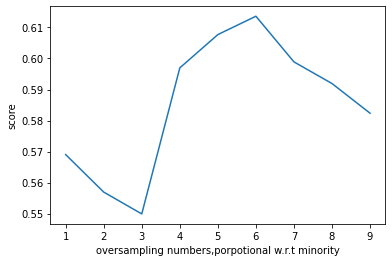

In [179]:
X=[1,2,3,4,5,6,7,8,9]
plt.plot(X,Y)
plt.xlabel('oversampling numbers, porpotional w.r.t minority')
plt.ylabel('score')

Randomly oversampling seems improve score on validation set, when sampling size is 6 times the minority's size, got the best score on validation set.

### Second method is increasing the weight increment when review is fake.

In [84]:
def fastpegasos3(review, max_epoch, lam, watch_list=None, grad_checking=False, fakeweight = 9):
    """
    Description
    ==========
    Implementat
    ion of Pegasos Algorithm 

    Input
    =====
    review_list: list of reviewInstance's
    list of objects with labels and encoded input from reviews

    max_epoch: int 
    stopping condition

    lam: float 
    regularization parameter

    watch_list: list or reviewInstance's
    passed to accuracy_percent or magnitude_compare; default None

    grad_checking: bool 
    numerical test of gradient of svm objective
    
    copytimes: int
    number of extra copies for each fake reviews

    Output
    ======
    weights
    """
    
    #Initialization
    s=1
    w = collections.Counter()
    epoch = 0
    t = 1
    n = len(review)

    

    #Loop
    # Use the util.increment and util.dotProduct functions in update
    while epoch < max_epoch:
        #print("epoch=", epoch)
        for i in range(n):
            y = review[i].label*2-1
            
         

                
            t = t+1
            ita = 1/(t*lam)
            s=(1-ita*lam)*s
            
            
            
            
            if y*dotProduct(w, review[i].wordic) < 1:
                
                
                
                #Implements d1 += scale * d2 for sparse vectors.
                if y==1:
                    
                    increment(w, fakeweight*ita*y/s,review[i].wordic)
                else:
                    increment(w, ita*y/s,review[i].wordic)
            
        
        epoch=epoch+1
    increment(w,s-1,w)
    
        
    return w

In [85]:
w3=fastpegasos3(review_t, 5 , 1, watch_list=None, grad_checking=False,fakeweight=9)

In [86]:
rate(w3,review_v)

0.13773038587894648

In [112]:
evaluate_model(review_v, w3, 'auROC')

0.5379224481349795

This method doesn't improve score.

### Third methods, implement SMOTE for bag of word. (unfinished yet)

create fake review list

In [81]:
review_f=[]
n=len(review_t)
for i in range(n):
    if review_t[i].label==1:
        review_f.append(review_t[i])

In [108]:
len(review_f)

25819

In [ ]:
get distance of bag of word:

In [129]:
def distance(review):
    dist=[]
    n=len(review)
    for i in range(n):
        dist.append([])
        for j in range(n):
            dist[i].append([])
        
    for i in range(n):
        for j in range(n):
            di = review[i].wordic.copy()
            dj = review[j].wordic
            
            increment(di, -1, dj)
            dist[i][j]=dotProduct(di,di)
    return dist
    
            
            
 
 
    